In [3]:
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload
import field_integrals as fi

In [131]:
reload(fi)

<module 'field_integrals' from 'e:\\UserData\\Workspace\\code\\git\\field_integrals\\field_integrals.py'>

In [132]:
Xmax = 100
xs = np.linspace(-Xmax,Xmax,200)
ys = np.linspace(-Xmax,Xmax,201)
zs = np.linspace(-Xmax,Xmax,203)
# Xs, Ys = np.meshgrid(xs, ys, indexing='ij')
Xs, Ys, Zs = np.meshgrid(xs, ys, zs, indexing='ij')

In [133]:
x0, y0, z0 = 5, 20, -10

In [134]:
# fw_gauss = np.exp(-(Xs**2+Ys**2))/2**2
# mygauss = fi.field(fieldvalues=fw_gauss, var=[xs,ys], coord_sys="cartesian")
# mygauss = fi.field(fieldvalues=fw_gauss, coordinates={"x": xs, "y": ys}, vocal=True)
fw_gauss = np.exp(-((Xs-x0)**2+(Ys-y0)**2+(Zs-z0)**2)/25**2)
# mygauss = fi.field(fieldvalues=fw_gauss, coordinates=[xs,ys,zs], dims=["x",'y','z'])
mygauss = fi.field(fieldvalues=fw_gauss, coordinates={"x": xs, "y": ys, "z": zs})
fw_sphere = 1* (np.sqrt((Xs-x0)**2+(Ys-y0)**2+(Zs-z0)**2) <= 50)
# mysphere = fi.field(fieldvalues=fw_sphere, coordinates=[xs,ys,zs], coord_sys="cartesian")
mysphere = fi.field(fieldvalues=fw_sphere, coordinates={"x": xs, "y": ys, "z": zs})

Plotting 2D slice of 3D field at z = 0.0.


(<Figure size 640x480 with 2 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

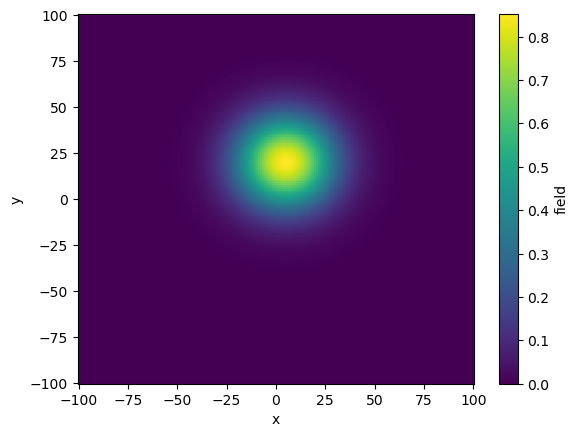

In [135]:
mygauss.plot(vocal=True)

Plotting 2D slice of 3D field at z = 0.0.


(<Figure size 640x480 with 2 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

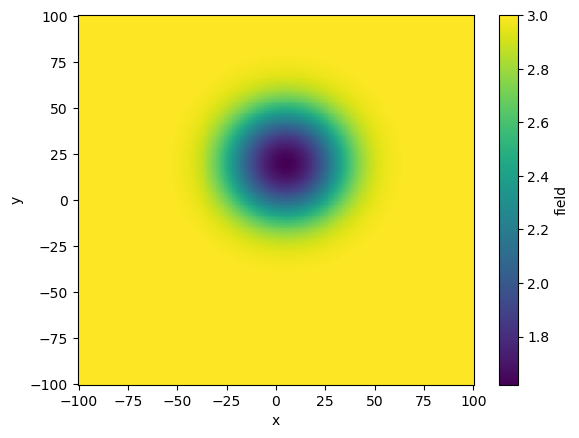

In [142]:
(3/(1+mygauss)).plot(vocal=True)

Plotting 2D slice of 3D field at z = 0.0.


(<Figure size 640x480 with 2 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

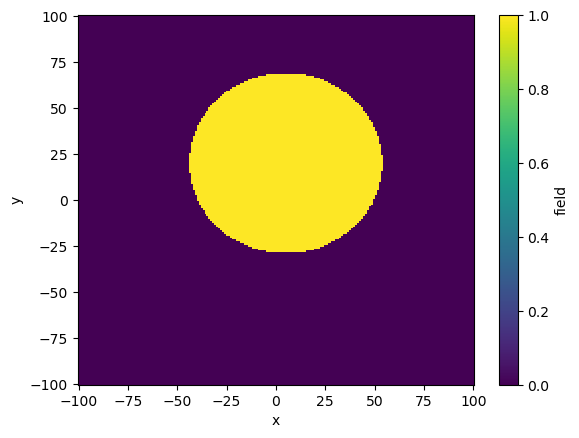

In [136]:
mysphere.plot(vocal=True)

Plotting 2D slice of 3D field at z = 0.0.


(<Figure size 640x480 with 2 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

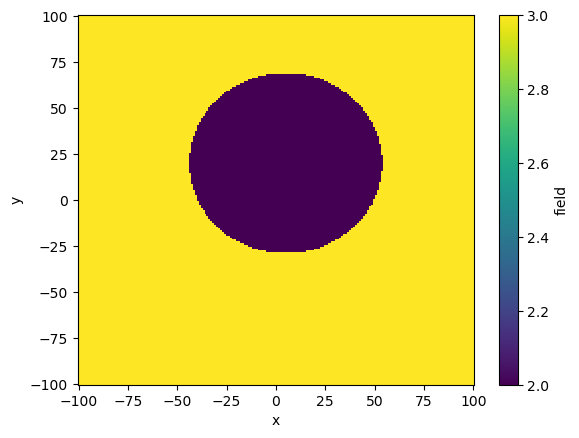

In [141]:
(3-mysphere).plot(vocal=True)

In [143]:
mygauss + mysphere
mygauss - mysphere
mygauss * mysphere
mygauss / mysphere

e:\UserData\Workspace\code\git\field_integrals\field_integrals.py:509: RuntimeWarning: divide by zero encountered in true_divide
  return field(self.values/other.values, self.coordinates, coordinate_system=self.coordinate_system, units=self.units, name=newname)


field in 3D, cartesian coordinates ['x', 'y', 'z'] with units {'x': None, 'y': None, 'z': None, 'field': None} and shape (200, 201, 203)

In [144]:
mysphere.normalize_abs2().overlap(mysphere.normalize_abs2())

1.0000000000000009

In [145]:
mygauss.integrate_all_dimensions(vocal=True)

integrating dimension 0: x from -100 to 100
integrating dimension 1: y from -100 to 100
integrating dimension 2: z from -100 to 100


87004.8422062902

In [146]:
mygauss.normalize().integrate_all_dimensions(vocal=True)

integrating dimension 0: x from -100 to 100
integrating dimension 1: y from -100 to 100
integrating dimension 2: z from -100 to 100


1.0

In [147]:
mygauss.normalize_abs2().integrate_all_dimensions()

496.0706159221452

In [148]:
(abs(mygauss.normalize_abs2())**2).integrate_all_dimensions()

1.0000000000000002

In [149]:
mygauss == mysphere

False

In [150]:
mysphere.integrate_all_dimensions()

523498.681526444

In [151]:
4/3*np.pi*50**3

523598.7755982988

In [152]:
Rmax = 75
rs = np.linspace(0,Rmax,200)
phis = np.linspace(0,2*np.pi,201)
zs = np.linspace(0,100,203)
Rs, Phis, Zs = np.meshgrid(rs, phis, zs, indexing='ij')

In [15]:
reload(fi)

<module 'overlap_integrals' from '/home/tom/Documents/git-repos/overlap_integrals/overlap_integrals.py'>

In [153]:
fw_cyl = 1* (Rs <= 50) & (Zs <= 20)
mysphere_cyl = fi.field(fieldvalues=fw_cyl, coordinates={"r": rs, "phi": phis, "z": zs}, vocal=True)
# mysphere_cyl = fi.field(fieldvalues=fw_cyl, var=[rs,phis,zs], coord_sys="cylindrical")

inputs are valid
field in 3D, cylindrical coordinates ['r', 'phi', 'z'] with units {'r': None, 'phi': None, 'z': None, 'field': None} and shape (200, 201, 203)


In [154]:
mysphere_cyl.integrate_all_dimensions(vocal=True)

integrating dimension 0: r from 0 to 75
integrating dimension 1: phi from 0 to 6.28319
integrating dimension 2: z from 0 to 100


157070.80610784283

In [ ]:
np.pi*50**2*20

157079.63267948967

In [155]:
mysphere_cyl.integrate_dimensions(["r",'z','phi'], vocal=True)

integrating dimension 0: r from 0 to 75
integrating dimension 1: z from 0 to 100
integrating dimension 2: phi from 0 to 6.28319


157070.80610784225

In [156]:
mysphere_cyl.normalize().integrate_all_dimensions()

0.9999999999999925

In [157]:
mysphere_cyl.normalize_abs2().integrate_all_dimensions()

396.32159429917715

In [158]:
(abs(mysphere_cyl.normalize_abs2())**2).integrate_all_dimensions()

0.9999999999999925

In [20]:
reload(fi)

<module 'overlap_integrals' from '/home/tom/Documents/git-repos/overlap_integrals/overlap_integrals.py'>

In [35]:
Rmax = 75
rs = np.linspace(0,Rmax,200)
thetas = np.linspace(0,np.pi,203)
phis = np.linspace(0,2*np.pi,201)
Rs, Thetas, Phis = np.meshgrid(rs,thetas, phis, indexing='ij')

In [36]:
fw_sph = 1* (Rs <= 50) & (Thetas <= np.pi/2) & (Phis <= np.pi/2)
mysphere_sph = fi.field(fieldvalues=fw_sph, coordinates={"r": rs, "theta": thetas, "phi": phis}, vocal=True)

inputs are valid
field in 3D, spherical coordinates ['r', 'theta', 'phi'] with shape (200, 203, 201)


In [23]:
mysphere_sph.integrate_dimensions(['phi'], vocal=True).integrate_dimensions(["theta"], vocal=True).integrate_dimensions(["r"], vocal=True)

integrating dimension 0: phi from 0.0 to 6.283185307179586
inputs are valid
field in 2D, spherical coordinates ['r', 'theta'] with shape (200, 203)
integrating dimension 0: theta from 0.0 to 3.141592653589793
inputs are valid
field in 1D, spherical coordinates ['r'] with shape (200,)
integrating dimension 0: r from 0.0 to 75.0


65051.19034114659

In [24]:
mysphere_sph.integrate_dimensions(["theta"], vocal=True).integrate_dimensions(["r",'phi'], vocal=True)

integrating dimension 0: theta from 0.0 to 3.141592653589793
inputs are valid
field in 2D, spherical coordinates ['r', 'phi'] with shape (200, 201)
integrating dimension 0: r from 0.0 to 75.0
integrating dimension 1: phi from 0.0 to 6.283185307179586


65051.190341146576

In [25]:
mysphere_sph.integrate_all_dimensions(vocal=True)

integrating dimension 0: r from 0.0 to 75.0
integrating dimension 1: theta from 0.0 to 3.141592653589793
integrating dimension 2: phi from 0.0 to 6.283185307179586


1953.990472134063

In [26]:
mysphere_sph.normalize().integrate_all_dimensions(vocal=True)

integrating dimension 0: r from 0.0 to 75.0
integrating dimension 1: theta from 0.0 to 3.141592653589793
integrating dimension 2: phi from 0.0 to 6.283185307179586


1.0

In [27]:
mysphere_sph.normalize_abs2().integrate_all_dimensions(vocal=True)

integrating dimension 0: r from 0.0 to 75.0
integrating dimension 1: theta from 0.0 to 3.141592653589793
integrating dimension 2: phi from 0.0 to 6.283185307179586


44.20396443910959

In [28]:
(abs(mysphere_sph.normalize_abs2())**2).integrate_all_dimensions(vocal=True)

integrating dimension 0: r from 0.0 to 75.0
integrating dimension 1: theta from 0.0 to 3.141592653589793
integrating dimension 2: phi from 0.0 to 6.283185307179586


1.0

In [29]:
4/3*np.pi*50**3 / 8

65449.84694978735

In [43]:
reload(fi)

<module 'overlap_integrals' from '/home/tom/Documents/git-repos/overlap_integrals/overlap_integrals.py'>

In [44]:
Rmax = 75
rs = np.linspace(0,Rmax,200)
thetas = np.linspace(0,np.pi,203)
phis = np.linspace(0,2*np.pi,201)
Rs, Thetas, Phis = np.meshgrid(rs,thetas, phis, indexing='ij')

In [45]:
fw_sph = 1* (Rs <= 50) & (Thetas <= np.pi/2) & (Phis <= np.pi/2)
mysphere_sph = fi.field(fieldvalues=fw_sph, coordinates={"r": rs, "theta": thetas, "phi": phis}, vocal=True)

inputs are valid
field in 3D, spherical coordinates ['r', 'theta', 'phi'] with shape (200, 203, 201)


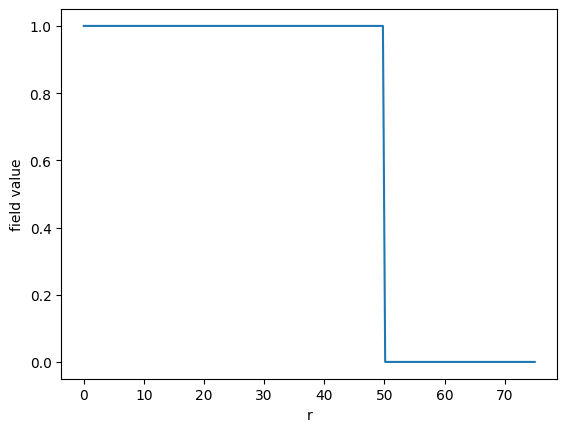

In [50]:
mysphere_sph.plot_1D("r", icuts={"theta": 0, "phi": 0})